📂 Checking dataset: ../datasets/FractureDetection

✅ Image count per class:

               image_count
Fractured              717
Non_fractured         3366

🔍 Showing samples from class: Fractured


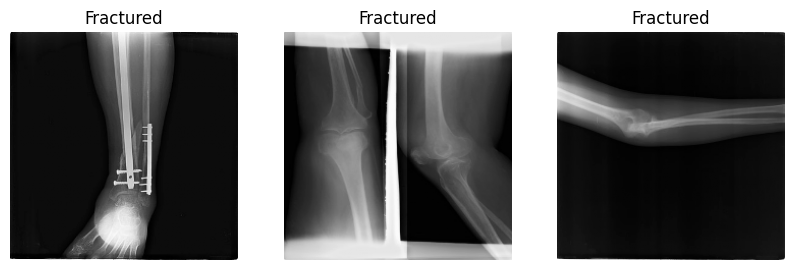


🔍 Showing samples from class: Non_fractured


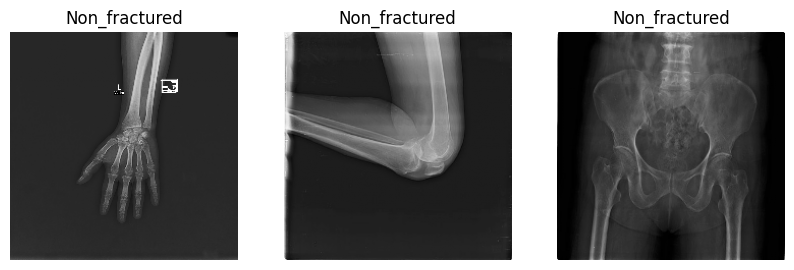

In [1]:

import os
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd

task = "FractureDetection"   

base_path = f"../datasets/{task}"   # "../" because notebook is inside notebooks/

print(f"📂 Checking dataset: {base_path}\n")

# -----------------------------
# 2. Count images in each class
# -----------------------------
counts = {}
for cls in os.listdir(base_path):
    class_path = os.path.join(base_path, cls)
    if os.path.isdir(class_path):
        counts[cls] = len(os.listdir(class_path))

df = pd.DataFrame.from_dict(counts, orient='index', columns=['image_count'])
print("✅ Image count per class:\n")
print(df)

# -----------------------------
# 3. Show random sample images
# -----------------------------
def show_samples(base_path, n=3):
    classes = os.listdir(base_path)
    for cls in classes:
        class_path = os.path.join(base_path, cls)
        if not os.path.isdir(class_path):
            continue
        print(f"\n🔍 Showing samples from class: {cls}")
        plt.figure(figsize=(10,3))
        for i in range(n):
            try:
                sample = random.choice(os.listdir(class_path))
                img = cv2.imread(os.path.join(class_path, sample), cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, (224,224))
                plt.subplot(1, n, i+1)
                plt.imshow(img_resized, cmap='gray')
                plt.title(cls)
                plt.axis('off')
            except Exception as e:
                print(f"⚠️ Error loading image in {cls}: {e}")
        plt.show()

show_samples(base_path, n=3)


📂 Input: ../datasets/FractureDetection
💾 Output: ../datasets/processed/fracture_detection

🔄 Processing Fractured images...

🔄 Processing Non_fractured images...

✅ Preprocessing complete! Processed data saved to: ../datasets/processed/fracture_detection


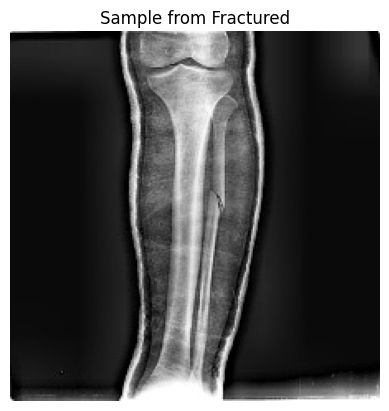

In [4]:
# ------------------------------------------------------------
# Preprocessing Notebook for Fracture Detection Dataset
# ------------------------------------------------------------

import os
import cv2
import random
import matplotlib.pyplot as plt
import albumentations as A

# -----------------------------
# 1. Paths
# -----------------------------
base_path = "../datasets/FractureDetection"
output_path = "../datasets/processed/fracture_detection"

classes = ["Fractured", "Non_fractured"]
valid_ext = [".jpg", ".jpeg", ".png", ".bmp"]

# Create output folders
for cls in classes:
    os.makedirs(os.path.join(output_path, cls), exist_ok=True)

print("📂 Input:", base_path)
print("💾 Output:", output_path)

# -----------------------------
# 2. Define Augmentation
# -----------------------------
augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Affine(scale=(0.9,1.1), translate_percent=(0.1,0.1), rotate=(-15,15), p=0.5)
])

# -----------------------------
# 3. Preprocessing Function
# -----------------------------
def preprocess_and_save(img_path, save_path, augment=False, num_aug=3):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return  # skip non-image files

    # Resize
    img_resized = cv2.resize(img, (224,224))

    # Normalize
    img_norm = img_resized / 255.0

    # CLAHE (contrast enhancement)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply((img_norm*255).astype('uint8'))

    # Save original processed
    filename = os.path.basename(img_path)
    save_file = os.path.join(save_path, filename)
    cv2.imwrite(save_file, img_clahe)

    # Augment if needed
    if augment:
        for i in range(num_aug):
            augmented = augmentor(image=img_clahe)["image"]
            aug_file = os.path.join(save_path, f"aug_{i}_{filename}")
            cv2.imwrite(aug_file, augmented)

# -----------------------------
# 4. Process Dataset
# -----------------------------
for cls in classes:
    input_folder = os.path.join(base_path, cls)
    output_folder = os.path.join(output_path, cls)

    print(f"\n🔄 Processing {cls} images...")

    files = [f for f in os.listdir(input_folder) 
             if os.path.splitext(f)[1].lower() in valid_ext]

    for file in files:
        img_path = os.path.join(input_folder, file)

        # Augment only Fractured (minority class)
        if cls == "Fractured":
            preprocess_and_save(img_path, output_folder, augment=True, num_aug=2)
        else:
            preprocess_and_save(img_path, output_folder, augment=False)

print("\n✅ Preprocessing complete! Processed data saved to:", output_path)

# -----------------------------
# 5. Show Samples (Verification)
# -----------------------------
sample_class = "Fractured"
sample_folder = os.path.join(output_path, sample_class)
sample_file = random.choice(os.listdir(sample_folder))
sample_img = cv2.imread(os.path.join(sample_folder, sample_file), cv2.IMREAD_GRAYSCALE)

plt.imshow(sample_img, cmap="gray")
plt.title(f"Sample from {sample_class}")
plt.axis("off")
plt.show()


In [5]:
import pandas as pd

counts = {}
for cls in classes:
    folder = os.path.join(output_path, cls)
    counts[cls] = len(os.listdir(folder))

df = pd.DataFrame.from_dict(counts, orient="index", columns=["image_count"])
print("\n📊 Final image count after preprocessing & augmentation:\n")
print(df)



📊 Final image count after preprocessing & augmentation:

               image_count
Fractured             2151
Non_fractured         3366


📂 Input: ../datasets/FractureDetection
💾 Output: ../datasets/processed/fracture_detection

🔄 Processing Fractured images...

🔄 Processing Non_fractured images...

✅ Preprocessing complete! Processed data saved to: ../datasets/processed/fracture_detection


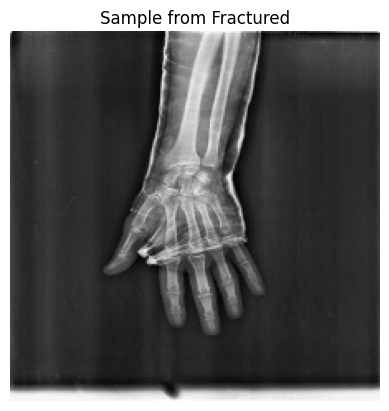

In [7]:
# ------------------------------------------------------------
# Preprocessing Notebook for Fracture Detection Dataset
# ------------------------------------------------------------

import os
import cv2
import random
import matplotlib.pyplot as plt
import albumentations as A

# -----------------------------
# 1. Paths
# -----------------------------
base_path = "../datasets/FractureDetection"
output_path = "../datasets/processed/fracture_detection"

classes = ["Fractured", "Non_fractured"]
valid_ext = [".jpg", ".jpeg", ".png", ".bmp"]

# Create output folders
for cls in classes:
    os.makedirs(os.path.join(output_path, cls), exist_ok=True)

print("📂 Input:", base_path)
print("💾 Output:", output_path)

# -----------------------------
# 2. Define Augmentation
# -----------------------------
augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Affine(scale=(0.9,1.1), translate_percent=(0.1,0.1), rotate=(-15,15), p=0.5)
])

# -----------------------------
# 3. Preprocessing Function
# -----------------------------
def preprocess_and_save(img_path, save_path, augment=False, num_aug=3):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return  # skip non-image files

    # Resize
    img_resized = cv2.resize(img, (224,224))

    # Normalize
    img_norm = img_resized / 255.0

    # CLAHE (contrast enhancement)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply((img_norm*255).astype('uint8'))

    # Save original processed
    filename = os.path.basename(img_path)
    save_file = os.path.join(save_path, filename)
    cv2.imwrite(save_file, img_clahe)

    # Augment if needed
    if augment:
        for i in range(num_aug):
            augmented = augmentor(image=img_clahe)["image"]
            aug_file = os.path.join(save_path, f"aug_{i}_{filename}")
            cv2.imwrite(aug_file, augmented)

# -----------------------------
# 4. Process Dataset
# -----------------------------
for cls in classes:
    input_folder = os.path.join(base_path, cls)
    output_folder = os.path.join(output_path, cls)

    print(f"\n🔄 Processing {cls} images...")

    files = [f for f in os.listdir(input_folder) 
             if os.path.splitext(f)[1].lower() in valid_ext]

    for file in files:
        img_path = os.path.join(input_folder, file)

        # Augment only Fractured (minority class)
        if cls == "Fractured":
            preprocess_and_save(img_path, output_folder, augment=True, num_aug=3)
        else:
            preprocess_and_save(img_path, output_folder, augment=False)

print("\n✅ Preprocessing complete! Processed data saved to:", output_path)

# -----------------------------
# 5. Show Samples (Verification)
# -----------------------------
sample_class = "Fractured"
sample_folder = os.path.join(output_path, sample_class)
sample_file = random.choice(os.listdir(sample_folder))
sample_img = cv2.imread(os.path.join(sample_folder, sample_file), cv2.IMREAD_GRAYSCALE)

plt.imshow(sample_img, cmap="gray")
plt.title(f"Sample from {sample_class}")
plt.axis("off")
plt.show()


In [8]:
import pandas as pd

counts = {}
for cls in classes:
    folder = os.path.join(output_path, cls)
    counts[cls] = len(os.listdir(folder))

df = pd.DataFrame.from_dict(counts, orient="index", columns=["image_count"])
print("\n📊 Final image count after preprocessing & augmentation:\n")
print(df)



📊 Final image count after preprocessing & augmentation:

               image_count
Fractured             2868
Non_fractured         3366


In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
base_path = r"C:\Users\lenovo\Desktop\FractureNet+\Datasets\FractureType"
dataset2_path = os.path.join(base_path, "FractureType2")
dataset3_path = os.path.join(base_path, "FractureType3")
merged_path = os.path.join(base_path)

train_path = os.path.join(merged_path, "train")
test_path = os.path.join(merged_path, "test")

# Create merged train/test folders
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# ==============================
# Step 1: Copy Dataset2 (already split)
# ==============================
print("Copying Dataset2...")
for split in ["train", "test"]:
    split_src = os.path.join(dataset2_path, split)
    split_dst = os.path.join(merged_path, split)

    for cls in os.listdir(split_src):
        cls_src = os.path.join(split_src, cls)
        cls_dst = os.path.join(split_dst, cls)
        os.makedirs(cls_dst, exist_ok=True)

        for img in os.listdir(cls_src):
            src_file = os.path.join(cls_src, img)
            if os.path.isfile(src_file):
                shutil.copy(src_file, os.path.join(cls_dst, img))

# ==============================
# Step 2: Split Dataset3 into train/test
# ==============================
print("Splitting Dataset3...")
for cls in os.listdir(dataset3_path):
    cls_folder = os.path.join(dataset3_path, cls)
    if not os.path.isdir(cls_folder):
        continue

    images = [
        f for f in os.listdir(cls_folder)
        if os.path.isfile(os.path.join(cls_folder, f)) and f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    if len(images) == 0:
        print(f"⚠️ Skipping {cls} (no images found)")
        continue

    # If very few images, put at least 1 into test set
    test_size = 0.2 if len(images) > 5 else 0.5  

    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    for img in train_images:
        shutil.copy(os.path.join(cls_folder, img), os.path.join(train_path, cls, img))

    os.makedirs(os.path.join(test_path, cls), exist_ok=True)
    for img in test_images:
        shutil.copy(os.path.join(cls_folder, img), os.path.join(test_path, cls, img))
print("Merged all Dataset3...")


Copying Dataset2...
Splitting Dataset3...
Merged all Dataset3...


In [10]:
import pandas as pd

def dataset_summary(path, name="Dataset"):
    print(f"\n📊 Summary of {name}:")
    summary = {}
    for cls in os.listdir(path):
        cls_folder = os.path.join(path, cls)
        if not os.path.isdir(cls_folder):
            continue
        summary[cls] = len([
            f for f in os.listdir(cls_folder)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ])
    df = pd.DataFrame.from_dict(summary, orient="index", columns=["image_count"])
    print(df)
    return df

train_summary = dataset_summary(train_path, "Train")
test_summary = dataset_summary(test_path, "Test")



📊 Summary of Train:
                            image_count
Avulsion fracture                   217
Comminuted fracture                 306
Compression-Crush fracture          117
Fracture Dislocation                262
Greenstick fracture                 211
Hairline Fracture                   205
Impacted fracture                   202
Intra-articular fracture             80
Longitudinal fracture               166
Oblique fracture                    165
Pathological fracture               217
Spiral Fracture                     181

📊 Summary of Test:
                            image_count
Avulsion fracture                    42
Comminuted fracture                  57
Compression-Crush fracture           30
Fracture Dislocation                 51
Greenstick fracture                  43
Hairline Fracture                    37
Impacted fracture                    41
Intra-articular fracture             21
Longitudinal fracture                37
Oblique fracture                     41

In [11]:
# datset balencing
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Find max images across classes
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in os.listdir(train_path)}
max_count = max(class_counts.values())

print("\n⚖️ Balancing classes...")
for cls, count in class_counts.items():
    cls_folder = os.path.join(train_path, cls)
    images = os.listdir(cls_folder)
    
    while len(os.listdir(cls_folder)) < max_count:
        img_name = random.choice(images)
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = load_img(img_path, target_size=(224, 224))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            for batch in augmenter.flow(x, batch_size=1, save_to_dir=cls_folder, save_prefix='aug', save_format='jpeg'):
                break  # one new image each loop
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

print("✅ Balancing done")



⚖️ Balancing classes...
✅ Balancing done


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import random, os

augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

target_count = max(train_summary["image_count"])  # 306 in your case

for cls in os.listdir(train_path):
    cls_folder = os.path.join(train_path, cls)
    if not os.path.isdir(cls_folder):
        continue
    
    images = os.listdir(cls_folder)
    while len(os.listdir(cls_folder)) < target_count:
        img_name = random.choice(images)
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = load_img(img_path, target_size=(224, 224))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            for batch in augmenter.flow(x, batch_size=1, save_to_dir=cls_folder,
                                        save_prefix='aug', save_format='jpeg'):
                break  # add one augmented image
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

print("✅ Train set balanced")


✅ Train set balanced


In [13]:
import pandas as pd

def dataset_summary(path, name="Dataset"):
    print(f"\n📊 Summary of {name}:")
    summary = {}
    for cls in os.listdir(path):
        cls_folder = os.path.join(path, cls)
        if not os.path.isdir(cls_folder):
            continue
        summary[cls] = len([
            f for f in os.listdir(cls_folder)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ])
    df = pd.DataFrame.from_dict(summary, orient="index", columns=["image_count"])
    print(df)
    return df

train_summary = dataset_summary(train_path, "Train")
test_summary = dataset_summary(test_path, "Test")


📊 Summary of Train:
                            image_count
Avulsion fracture                   306
Comminuted fracture                 306
Compression-Crush fracture          306
Fracture Dislocation                306
Greenstick fracture                 306
Hairline Fracture                   306
Impacted fracture                   306
Intra-articular fracture            306
Longitudinal fracture               306
Oblique fracture                    306
Pathological fracture               306
Spiral Fracture                     306

📊 Summary of Test:
                            image_count
Avulsion fracture                    42
Comminuted fracture                  57
Compression-Crush fracture           30
Fracture Dislocation                 51
Greenstick fracture                  43
Hairline Fracture                    37
Impacted fracture                    41
Intra-articular fracture             21
Longitudinal fracture                37
Oblique fracture                     41

In [19]:
# Balancing Fragility Detectriondataset

import os
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import pandas as pd

# =========================
# Paths
# =========================
dataset_path = r"C:\Users\lenovo\Desktop\FractureNet+\Datasets\FragilityLevelDetection"  # your dataset folder
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")  # usually no augmentation on test

# =========================
# Step 1: Clean dataset (remove non-image or corrupted files)
# =========================
def clean_dataset(path):
    removed = 0
    for cls in os.listdir(path):
        cls_folder = os.path.join(path, cls)
        if not os.path.isdir(cls_folder):
            continue
        for img_name in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, img_name)
            # Only keep image extensions
            if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
                os.remove(img_path)
                removed += 1
                continue
            # Remove corrupted images
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except Exception:
                os.remove(img_path)
                removed += 1
    print(f"🧹 Cleaned {removed} files from {path}")

print("Cleaning train set...")
clean_dataset(train_path)
print("Cleaning test set...")
clean_dataset(test_path)

# =========================
# Step 2: Balance training set using augmentation
# =========================
augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Find the maximum class count
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) 
                for cls in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, cls))}
max_count = max(class_counts.values())
print(f"Maximum images in a class: {max_count}")

# Augment underrepresented classes
for cls, count in class_counts.items():
    cls_folder = os.path.join(train_path, cls)
    images = os.listdir(cls_folder)
    while len(os.listdir(cls_folder)) < max_count:
        img_name = random.choice(images)
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = load_img(img_path, target_size=(224, 224))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            # Generate and save one augmented image per loop
            for batch in augmenter.flow(x, batch_size=1, save_to_dir=cls_folder, 
                                        save_prefix='aug', save_format='jpeg'):
                break
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

print("✅ Training set balanced")

# =========================
# Step 3: Print summary of train and test sets
# =========================
def dataset_summary(path, name="Dataset"):
    print(f"\n📊 Summary of {name}:")
    summary = {}
    for cls in os.listdir(path):
        cls_folder = os.path.join(path, cls)
        if not os.path.isdir(cls_folder):
            continue
        summary[cls] = len([f for f in os.listdir(cls_folder) 
                            if f.lower().endswith((".jpg", ".jpeg", ".png"))])
    df = pd.DataFrame.from_dict(summary, orient="index", columns=["image_count"])
    print(df)
    return df

train_summary = dataset_summary(train_path, "Train (After Balancing)")
test_summary = dataset_summary(test_path, "Test")


Cleaning train set...
🧹 Cleaned 0 files from C:\Users\lenovo\Desktop\FractureNet+\Datasets\FragilityLevelDetection\train
Cleaning test set...
🧹 Cleaned 0 files from C:\Users\lenovo\Desktop\FractureNet+\Datasets\FragilityLevelDetection\test
Maximum images in a class: 796
✅ Training set balanced

📊 Summary of Train (After Balancing):
              image_count
Normal                796
Osteopenia            796
Osteoporosis          796

📊 Summary of Test:
              image_count
Normal                453
Osteopenia            223
Osteoporosis          471


In [18]:
import os
import random
import shutil
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import pandas as pd

# =========================
# Paths
# =========================
dataset_path = r"C:\Users\lenovo\Desktop\FractureNet+\Datasets\FragilityLevelDetection"  # original folder with class subfolders
combined_path = r"C:\Users\lenovo\Desktop\FragilityLevelDetection_split"
train_path = os.path.join(combined_path, "train")
test_path = os.path.join(combined_path, "test")
split_ratio = 0.8  # 80% train, 20% test

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# =========================
# Step 1: Split dataset into train/test
# =========================
for cls in os.listdir(dataset_path):
    cls_folder = os.path.join(dataset_path, cls)
    if not os.path.isdir(cls_folder):
        continue

    # List only image files
    images = [f for f in os.listdir(cls_folder) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    if len(images) == 0:
        print(f"⚠️ Skipping {cls} (no images found)")
        continue

    random.shuffle(images)
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy to train folder
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    for img in train_images:
        shutil.copy(os.path.join(cls_folder, img), os.path.join(train_path, cls, img))

    # Copy to test folder
    os.makedirs(os.path.join(test_path, cls), exist_ok=True)
    for img in test_images:
        shutil.copy(os.path.join(cls_folder, img), os.path.join(test_path, cls, img))

print("✅ Dataset split into train/test")

# =========================
# Step 2: Clean dataset (remove corrupt/non-image files)
# =========================
def clean_dataset(path):
    removed = 0
    for cls in os.listdir(path):
        cls_folder = os.path.join(path, cls)
        if not os.path.isdir(cls_folder):
            continue
        for img_name in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, img_name)
            # Only keep image extensions
            if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
                os.remove(img_path)
                removed += 1
                continue
            # Remove corrupted images
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except Exception:
                os.remove(img_path)
                removed += 1
    print(f"🧹 Cleaned {removed} files from {path}")

print("Cleaning train set...")
clean_dataset(train_path)
print("Cleaning test set...")
clean_dataset(test_path)

# =========================
# Step 3: Balance training set using augmentation
# =========================
augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Find max images per class in train
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) 
                for cls in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, cls))}
max_count = max(class_counts.values())
print(f"Maximum images in a class: {max_count}")

# Augment underrepresented classes
for cls, count in class_counts.items():
    cls_folder = os.path.join(train_path, cls)
    images = os.listdir(cls_folder)
    while len(os.listdir(cls_folder)) < max_count:
        img_name = random.choice(images)
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = load_img(img_path, target_size=(224, 224))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            for batch in augmenter.flow(x, batch_size=1, save_to_dir=cls_folder, 
                                        save_prefix='aug', save_format='jpeg'):
                break
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

print("✅ Training set balanced")

# =========================
# Step 4: Print summary
# =========================
def dataset_summary(path, name="Dataset"):
    print(f"\n📊 Summary of {name}:")
    summary = {}
    for cls in os.listdir(path):
        cls_folder = os.path.join(path, cls)
        if not os.path.isdir(cls_folder):
            continue
        summary[cls] = len([f for f in os.listdir(cls_folder) 
                            if f.lower().endswith((".jpg", ".jpeg", ".png"))])
    df = pd.DataFrame.from_dict(summary, orient="index", columns=["image_count"])
    print(df)
    return df

train_summary = dataset_summary(train_path, "Train (After Balancing)")
test_summary = dataset_summary(test_path, "Test")


⚠️ Skipping test (no images found)
⚠️ Skipping train (no images found)
✅ Dataset split into train/test
Cleaning train set...
🧹 Cleaned 0 files from C:\Users\lenovo\Desktop\FragilityLevelDetection_split\train
Cleaning test set...
🧹 Cleaned 0 files from C:\Users\lenovo\Desktop\FragilityLevelDetection_split\test
Maximum images in a class: 634
✅ Training set balanced

📊 Summary of Train (After Balancing):
              image_count
Normal                634
Osteopenia            634
Osteoporosis          634

📊 Summary of Test:
              image_count
Normal                156
Osteopenia             75
Osteoporosis          159
